In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

For vehicle mobility and to be as realistic as possible,
we use an available dataset [26] with real-time position data
reported by buses in Rio. The vehicle mobility dataset is in
24h time format. For our experiments, we select one week’s
worth of vehicle data, i.e., $ = 7, and consider every 15
minutes to be one step ∆τ = 15, which means that the
agent takes actions every 15 minutes. For one day, there are
96 steps in total (T = 96). Fig. 5 shows a time series of
number of vehicles |Vt| over time t for the 7-day period
considered, as well as the 68% confidence interval. Note that
the intervals ∆τ can be set smaller, e.g., 5 minutes and 3 minutes. However, we find 15 minutes a reasonable interval
for this dataset because this interval can provide an apparent
variation on vehicular distribution between steps

In [2]:
with open('data/F_G_Rio_3km.pickle', 'rb') as file:
    data = np.load(file, allow_pickle=True)

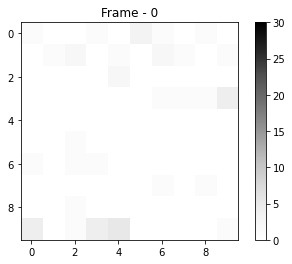

In [3]:
DAY = 0
INTERVAL = 10.0
MIN, MAX = (0, 30)

fig = plt.figure()
ax = fig.add_subplot(111)

img = ax.imshow(data[DAY][0], animated=True, cmap=cm.get_cmap('Greys'))
img.set_clim(MIN, MAX)
fig.colorbar(img)
tx = ax.set_title(f'Frame - {0}')

In [4]:
def animate(frame_number):
    frame = data[DAY][frame_number]

    img.set_data(frame)
    tx.set_text(f'Frame - {frame_number}')

In [5]:
ani = animation.FuncAnimation(fig, animate, frames=len(data[DAY]), repeat=False, interval=INTERVAL)
plt.show()

Since it has the vehicles count at each space division for every time intervals, we then need to get the maximum buses value in the first frame and its space division indexes and build a tracemap (rule: get the previous frame maximum indices, its neighbours and identify which of them has more buses).

In [63]:
indexes = tuple(index[0] for index in np.where(data[DAY][0] == np.amax(data[DAY][0])))

In [52]:
movements = [(-1, 1), (0, 1), (1, 1),\
             (-1, 0),         (1, 0),\
             (-1,-1), (0,-1), (1,-1)]

In [110]:
MAX = len(data[DAY][0])

def sum_tuples(movement, coordinates):
    return tuple(map(sum, list(zip(movement, coordinates))))

def generate_movements_indexes(coordinates):
    return list(map(lambda movement: sum_tuples(movement, coordinates), movements))


def is_valid_coordinate(coordinate):
    x, y = coordinate
    return x > 0 and y > 0 and \
           x < MAX and y < MAX

def filter_valid_coordinates(movements_indexes):
    return list(filter(is_valid_coordinate, movements_indexes))

def get_value(coordinate, frame):
    x, y = coordinate
    return frame[x][y]

def get_neighbours_values(valid_coordinates_list, step):
    frame = data[DAY][step]
    return list(map(lambda coordinate: tuple([coordinate, get_value(coordinate, frame)]), valid_coordinates_list))

def get_max_value_neighbour_indexes(neighbours_values):
    max_value = -1
    max_value_neighbour_indexes = (0,0)

    for coordinates, value in neighbours_values:
        if value > max_value:
            max_value = value
            max_value_neighbour_indexes = coordinates
    
    return coordinates

In [117]:
import random

tracemap = list()
STEPS_QUANTITY = len(data[DAY])

for step in range(0, STEPS_QUANTITY):
    ## This appends the indexes with greatest value in frame
    coordinates = tuple(index[0] for index in np.where(data[DAY][step] == np.amax(data[DAY][step])))
    tracemap.append(coordinates)

    ## This appends the neighbour indexes with greatest value
    # tracemap.append(coordinates)
    # coordinates = get_max_value_neighbour_indexes(
    #         get_neighbours_values(
    #             filter_valid_coordinates(
    #                 generate_movements_indexes(coordinates)
    #             ),
    #             step
    #         )
    #     )

print(tracemap)

[(9, 4), (1, 2), (3, 9), (1, 2), (8, 0), (9, 0), (6, 0), (9, 0), (9, 0), (9, 0), (9, 0), (9, 0), (9, 0), (8, 0), (9, 0), (9, 0), (9, 0), (6, 1), (0, 0), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (9, 3), (3, 9), (3, 9), (2, 4), (2, 4), (2, 4), (9, 3), (2, 4), (3, 9), (3, 9), (9, 3), (3, 9), (3, 9), (2, 4), (2, 4), (3, 9), (3, 9), (2, 5), (9, 3), (3, 9), (3, 9), (3, 9), (2, 5), (3, 9), (3, 9), (3, 9), (2, 8), (3, 9), (3, 9), (3, 9), (2, 4), (2, 4), (3, 9), (2, 4), (3, 9), (3, 9), (3, 9), (2, 4), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (0, 8), (2, 5), (0, 8), (2, 4), (2, 4), (2, 4), (2, 4), (3, 9), (2, 5), (2, 5), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (2, 4), (3, 9), (1, 2), (0, 0), (0, 8), (2, 4)]
